## Instituto Tecnológico de Costa Rica (ITCR) 
### Escuela de Ingeniería en Cumputación
### Curso: Aprendizaje Automático

### Redes Neuronales

Autores: Saúl Calderón, Juan Esquivel, Luis-Alexánder Calvo-Valverde, María Auxiliadora Mora

## Introducción


Las redes neuronales utilizan funciones de activación (funciones base) que permiten estandarizar los datos de entrada a un rango de valores de salida. Una función base $\phi_{j}$ tiene la forma: 



$$\phi_{j}\left(\vec{x},\vec{\theta}\right)=h\left(\sum_{i=0}^{D}\theta_{i}x_{i}\right)$$



Donde $\theta_{i}$ corresponde a los pesos y $h$ a la función de activación. 

Por lo que, la salida de un Perceptrón con una capa oculta se calcula de la siguiente forma:


>\begin{equation}
y\left(\vec{x}\right)=f\left(\sum_{j=0}^{M}w_{j}^{s}\:h\left(\sum_{i=0}^{D}w_{i}^{o}x_{i}\right)\right)
\label{eq:e2} \tag{2}
\end{equation}


Donde $h\left(x_i\right)$ **es una función no lineal y su salida
está en función de una combinación lineal** de las entradas $x_i$ con los pesos $\vec{w_{i}^{o}}$.
Exploremos más detalladamente como están dadas tales funciones de activación, ilustrándolo con un grafo. Observe de izquierda a derecha la figura:

![Diagrama de una red neuronal de dos capas (usualmente la capa de entrada
no se incluye)](../imagenes/Perceptron.png)

$$Figura 1$$

La red es escencialmente un grafo, por ejemplo, de tres capas:


*  La capa de $D$ nodos de entrada, constituidos por los valores $x_{1},x_{2},\ldots,x_{D}$
del arreglo de entrada $\vec{x}\in\mathbb{R}^{D}$.
*   La capa de $M$ nodos $y_{0}^{o},y_{1}^{o},y_{2}^{o},\ldots,y_{M}^{o}$,
en notación vectorial dada por $\overrightarrow{y^{o}}\in\mathbb{R}^{M}$, llamada capa oculta, la cual **controla el nivel de generalización** de la red (suavidad de la superficie de decisión).
* La capa de salida, constituida por $K$ nodos $y_{1}^{s},\ldots,y_{K}^{s}$, con $\overrightarrow{y^{s}}\in\mathbb{R}^{K}$, lo cual corresponde al **número $K$ de clases por discriminar**. 



## La capa oculta

El grafo está definido por **dos matrices de pesos** $W^{o}\in\mathbb{R}^{D\times M}$
y $W^{s}\in\mathbb{R}^{M\times K}$ (se usará una notación en mayúscula
para implicar el uso de una matriz, aunque también se puede suponer
que $W$ es un vector con dos subindices). La primera matriz de pesos
conecta a la capa de entrada con la capa oculta, y la segunda matriz
conecta la capa oculta con la capa de salida. La figura 2 ejemplifica la matriz $W^{o}\in\mathbb{R}^{D\times M}$.

![Matriz de pesos](../imagenes/pesos_W.png)
$$Figura 2$$


Para cada nodo $j$ en la capa oculta, se define el **peso neto
o coeficiente de activación** $p_{m}^{o}$ el cual está dado por la
combinación lineal de los valores en los nodos de entrada: 

\begin{equation}
p_{m}^{o}\left(\vec{x},W^{o}\right)=\sum_{d=1}^{D}W_{d,m}^{o}x_{d}+W_{0,m}^{o}   
\label{eq:e3} \tag{3}
\end{equation}

donde el peso $W_{0,m}^{o}$ comúnmente se refiere como **sesgo**,
por lo que para expresar al peso neto de la capa oculta $p_{m}^{o}$
como únicamente una combinación lineal sin sesgo o desplazamiento,
se reescribe:



> $p_{m}^{o}\left(\vec{x},W^{o}\right)=\sum_{d=0}^{D}W_{d,m}^{o}x_{d}$


El peso neto $p_{m}^{o}$ de la neurona
$m$ es transformado usando una **función de activación** no
lineal y diferenciable en la capa oculta $g^{o}\left(\cdot\right)$: 

\begin{equation}
y_{m}^{o}\left(\vec{x},W^{o}\right)=g^{o}\left(p_{m}^{o}\left(\vec{x},W^{o}\right)\right) 
\label{eq:e4} \tag{4}
\end{equation}

con lo cual se puede observar que la función $y_{m}^{o}$ corresponde
a la función base $\phi_{m}\left(\vec{x},\vec{\theta}\right)$,

> $\phi_{m}\left(\vec{x},\vec{\theta}\right)=h\left(\sum_{j=0}^{D}\theta_{j}x_{j}\right)$

con los parámetros de la función base dados por $\vec{\theta}=W^{o}$,
y con $h=g^{o}$. Al valor de los nodos $y_{0}^{o},y_{1}^{o},y_{2}^{o},\ldots,y_{M}^{o}$
se les llama las **salidas de la capa oculta**. 

La **función de activación** $h=g^{o}$ usualmente se escoge
para que sea suave (derivable), y denote el estado
de una neurona como activada o desactivada ante una entrada específica.
Como veremos, la condición de que la función de activación sea derivable,
es importante para poder calcular el gradiente y facilitar la minimización
del error de clasificación o regresión. Las funciones de activación comunmente
utilizadas son la tangente hiperbólica y la función sigmoidal, respectivamente
dadas por: 

\begin{array}{cc}
\tanh\left(x\right)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} & \textrm{sigmoid}\left(x\right)=\frac{1}{1+e^{-x}}\\
\frac{\textrm{d}}{\textrm{d}x}\tanh\left(x\right)=1-\tanh^{2}\left(x\right) & \frac{\textrm{d}}{\textrm{d}x}\textrm{sigmoid}\left(x\right)=\frac{e^{-x}}{\left(1+e^{-x}\right)^{2}}
\end{array}



Dado el uso extensivo que haremos de la función *sigmoidal*,
expresaremos su derivada de forma más compacta: 
\begin{equation}
\frac{\textrm{d}}{\textrm{d}x}\textrm{sigmoid}\left(x\right)=\frac{e^{-x}}{\left(1+e^{-x}\right)^{2}}=\frac{1}{\left(1+e^{-x}\right)}\frac{e^{-x}}{\left(1+e^{-x}\right)}
\end{equation}
donde tomando el término derecho de tal multiplicación:

> $\frac{e^{-x}}{\left(1+e^{-x}\right)}=\frac{1+e^{-x}-1}{\left(1+e^{-x}\right)}$
> $\Rightarrow\frac{1+e^{-x}}{\left(1+e^{-x}\right)}-\frac{1}{\left(1+e^{-x}\right)}=\left(1-\frac{1}{\left(1+e^{-x}\right)}\right)$

por lo que entonces la ecuación se puede
reescribir como: 
> $
\frac{\textrm{d}}{\textrm{d}x}\textrm{sigmoid}\left(x\right)=\frac{e^{-x}}{\left(1+e^{-x}\right)^{2}}=\frac{1}{\left(1+e^{-x}\right)}\left(1-\frac{1}{\left(1+e^{-x}\right)}\right)
$

lo cual significa que: 
\begin{equation}
\frac{\textrm{d}}{\textrm{d}x}\textrm{sigmoid}\left(x\right)=\textrm{sigmoid}\left(x\right)\left(1-\textrm{sigmoid}\left(x\right)\right)
\label{eq:e5} \tag{5}
\end{equation}

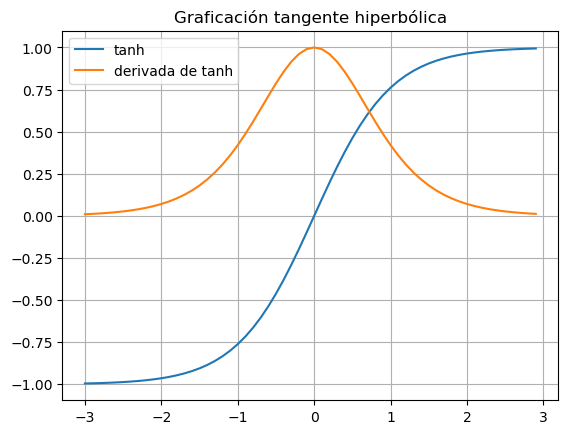

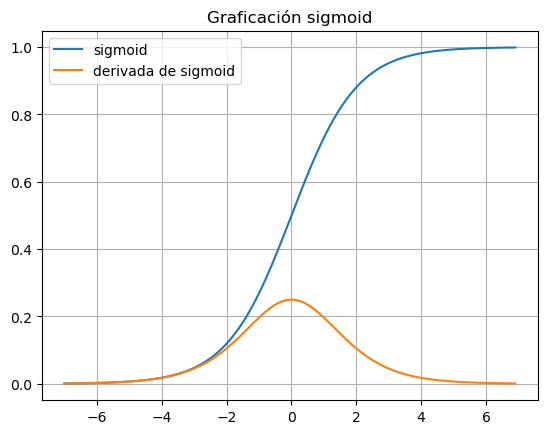

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(-3.0, 3.0, 0.10)
y = []
for i in x:
    y.append(np.tanh(i))
y = np.array(y)
plt.plot(x,y, label="tanh")
z = []
for i in x:
    z.append(1-np.tanh(i)**2)
z = np.array(z)
plt.plot(x,z, label="derivada de tanh")
plt.xlabel('')
plt.ylabel('')
plt.title('Graficación tangente hiperbólica')
plt.legend()
plt.grid(True)
plt.show()

def sigmoid(pX):
    r = 1. / (1. + math.e**(-pX))
    return r

def derSigmoid(pX):
    r =  sigmoid(pX) * (1. - sigmoid(pX))
    return r

plt.clf()
x = np.arange(-7.0, 7.0, 0.10)
y = [ sigmoid(i)  for i in x]
z = [ derSigmoid(i)  for i in x]
plt.plot(x,y, label="sigmoid")
plt.plot(x,z, label="derivada de sigmoid")
plt.xlabel('')
plt.ylabel('')
plt.title('Graficación sigmoid')
plt.legend()
plt.grid(True)
plt.show()


## La capa de salida


Siguiendo el grafo de la red neuronal en la Figura 1,
se define **el peso neto para la unidad de salida** $\textbf{k}$ como:

\begin{equation}
p_{k}^{s}\left(\vec{x},W^{s}\right)=\sum_{m=0}^{M}W_{m,k}^{s}y_{m}^{o}
\label{eq:etiq6} \tag{6}
\end{equation}

para cada unidad $k=1,\ldots,K$, donde de manera similar para la
capa anterior, $y_{0}^{o}=1$. Observe que el peso neto de una unidad
o neurona en la capa de salida está dado por la **combinación
lineal de las salidas en las unidades ocultas**, usando los pesos definidos
entre la capa oculta y de salida. La **salida de cada unidad
de la capa de salida**, está dada por: 

$
y_{k}^{s}\left(\vec{x},W^{s}\right)=g^{s}\left(p_{k}^{s}\left(\vec{x},W^{s}\right)\right)
$

donde la función de activación $g^{s}\left(u\right)$ para las unidades
de salida se elige usualmente según los siguientes casos:


## Funciones de activación



* Para la regresión (clasificación en dominio continuo) se escoge la **función identidad**, de modo que $g^{s}\left(u\right)=u$
o **lineal**.

* Para la clasificación binaria o de dos clases donde entonces $K=2$, se utiliza una función de activación de **tangente hiperbólico
o la función sigmoidal**. Esto pues la red neuronal utiliza una codificación de la salida $1-K$, de modo que si por ejemplo la red quiere dar a entender
que una entrada $\vec{x}_{a}$ corresponde a la clase $1$, entonces las unidades de salida  deben representar lo anterior con $y_{1}\approx1$ y $y_{2}\approx0$, y en caso de corresponder a la clase $2$, $y_{1}\approx0$ y $y_{2}\approx1$.

* Para la clasificación en múltiples clases $K>2$ usualmente se utiliza la función **softmax** o la de **tangente hiperbólico** anteriormente
vista. La función softmax asocia sus entradas a un valor de salida $0\leq y_{k}^{s}\leq1$. La función softmax denota
la probabilidad de que dado los valores de la muestra $\vec{x}$ , la misma sea de la clase $C_{k}$, $\textrm{softmax}\left(\vec{p^{s}},p_{k}^{s}\right)=p\left(C_{k}|\vec{p^{s}}\right)$
y está dada por: 
> $\textrm{softmax}\left(\vec{p^{s}},p_{k}^{s}\right)=\frac{e^{p_{k}^{s}}}{\sum_{j}e^{p_{j}^{s}}}.$

La función softmax no es más que la normalización respecto
a las demás salidas, para $K>2$ clases. **La función de activación
sigmoidal** sólo toma en cuenta el peso neto de su unidad, y no de las
demás unidades en la misma capa:

>$\textrm{sigmoid}\left(p_{k}^{s}\right)=\frac{1}{1+e^{-p_{k}^{s}}}$ 



Por ejemplo, en el arreglo de coeficientes de activación
 dado por $\vec{p^{s}}=\begin{bmatrix}3\\
2\\
1
\end{bmatrix}$, donde en este caso el compontente $p_{0}^{s}$ es el mayor y debe
asignársele la mayor probabilidad, por lo que al hacer que $y_{k}\left(\vec{p^{s}},p_{k}^{s}\right)=\textrm{softmax}\left(\vec{p^{s}},p_{k}^{s}\right)$
para todos los valores $p_{k}^{s}$ resulta en 
>>$
\vec{y}_{\textrm{softmax}}=\begin{bmatrix}0.6652\\
0.2447\\
0.0900
\end{bmatrix}\qquad\vec{y}_{\textrm{sigmoid}}=\begin{bmatrix}0.9526\\
0.8808\\
0.7311
\end{bmatrix}
$

>donde se observa como la salida de la función *softmax* da
un valor mucho más bajo al tercer componente cuando se compara con
la función *sigmoidal*.


In [3]:
import numpy as np

a = np.array([3, 2, 1]);
ySoftmax = np.zeros(a.size)
ySigmoid = np.zeros(a.size)
print('Input vector: ')
print(a)

ySoftmax[0] = np.exp(a[0])/ np.sum(np.exp(a));
ySoftmax[1] = np.exp(a[1])/ np.sum(np.exp(a));
ySoftmax[2] = np.exp(a[2])/ np.sum(np.exp(a)); 
print('Softmax output: ')
print(ySoftmax)

# Salida con la funcion sigmoidal
ySigmoid[0] = 1 / (1 + np.exp(-a[0]))
ySigmoid[1] = 1 / (1 + np.exp(-a[1]))
ySigmoid[2] = 1 / (1 + np.exp(-a[2]))
print('Sigmoid output: ')
print(ySigmoid)

Input vector: 
[3 2 1]
Softmax output: 
[0.66524096 0.24472847 0.09003057]
Sigmoid output: 
[0.95257413 0.88079708 0.73105858]


## Entrenamiento de la red

Se define entonces una matriz de muestras de entrada 

$
X=\begin{bmatrix}| & | & | & \text{|}\\
\vec{x}_{1} & \vec{x}_{2} & \ldots & \vec{x}_{N}\\
| & | & | & |
\end{bmatrix}
$

 (lo que corresponde a una manera de representar al conjunto de $N$
vectores de entrenamiento $\left\{ \vec{x}_{1},\ldots,\vec{x}_{N}\right\} $)
y el conjunto correspondiente de vectores de etiquetas  $\vec{t}$ (conocido de
antemano).

Para construir un clasificador
es necesario **encontrar el vector de pesos $\vec{w}$ que minimice la
función de error** cuadrático medio: 

$
E\left(\vec{w}\right)=\frac{1}{2}\sum_{n=1}^{N}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-\vec{t}_{n}\right\Vert ^{2},
$

donde se observa que efectivamente la función $E\left(\vec{w}\right)$
tiene su dominio en $\mathbb{R}^{2}$ y su codominio en $\mathbb{R}$,
una función multivariable para la cual podemos calcular sus derivadas parciales. 

El mínimo en una función multivariable como el caso de
la función $E\left(\vec{w}\right)$ ocurre cuando el gradiente tiende
a cero: 

$
\nabla E\left(\vec{w}_{\textrm{opt}}\right)=0,
$

El objetivo de la búsqueda es encontrar un vector gradiente con magnitud lo suficientemente pequeña,
determinada por $\epsilon$:

$
\left\Vert \nabla E\left(\vec{w}\right)\right\Vert <\epsilon.
$


Dado que no es posible encontrar una solución analítica a la ecuación

$
\nabla E\left(\vec{w}\right)=0,
$

es necesario utilizar métodos numéricos para ello. La optimización
de funciones continuas no lineales es un problema muy estudiado y
existen muchas técnicas para lograr tal objetivo. Muchas de las técnicas
involucran la elección de un valor inicial para el vector de pesos
$\vec{w}_{0}\in\mathbb{R}^{M}$, y con una serie de iteraciones cambiar
tal vector *moviéndose* por el espacio $\mathbb{R}^{M}$.

Para más información sobre el algoritmo de retropropagación
y sus orígenes, puede ver http://people.idsia.ch/~juergen/who-invented-backpropagation.html.

## Optimización de los pesos por descenso de gradiente y retropropagación

El enfoque básico para escoger al vector de actualización $\triangle\vec{w}\left(\tau\right)$
es hacerlo igual al negativo del vector gradiente de modo que $\triangle\vec{w}\left(\tau\right)=-\nabla E\left(\vec{w}\left(\tau\right)\right)$,
por lo que entonces: 

$
\vec{w}\left(\tau+1\right)=\vec{w}\left(\tau\right)-\alpha\:\nabla E\left(\vec{w}\left(\tau\right)\right).
$ 

En las **redes neuronales de múltiples capas**, recordemos que tenemos
al menos dos matrices de pesos a optimizar ($W^{o}$ y $W^{s}$) por
lo que al proceso de aplicar el descenso de gradiente desde la capa
de salida hacia la capa de entrada se le conoce como **retro-propagación
del error**. El **proceso de entrenamiento de retropropagación con descenso
de gradiente se puede dividir en las siguientes etapas**:

* Propagación del error para calcular las derivadas parciales desde
la capa de salida hacia la entrada (hacia atrás). 
* Utilizar el resultado del gradiente evaluado desde la entrada para
calcular los ajustes a realizar en los pesos, lo que corresponde a
la aplicación de la técnica de **descenso del gradiente**.

Una excelene explicación a cargo del Dr. Patrick Winston (Exdirector del Laboratiorio de IA de MIT) la encuentran en (Winston, 2010).

Cabe destacar que esta técnica de retro-propagación del error puede
ser combinada con cualquier otro método para fijar el valor nuevo
del gradiente, por lo que es importante distinguir las dos etapas.

Retomando entonces la ecuación del error definida como:


$
E\left(\vec{w}\right)=\frac{1}{2}\sum_{n=1}^{N}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-\vec{t}_{n}\right\Vert ^{2},
$

para facilitar su análisis la podemos reescribir como: 

$
E\left(\vec{w}\right)=\sum_{n=1}^{N}E_{n}\left(\vec{w}\right)
$

con 

$
E_{n}\left(\vec{w}\right)=\frac{1}{2}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-t_{n}\right\Vert ^{2}
$

 definido como el error de clasificación para una muestra $\vec{x}_{n}$
o **función de pérdida** (*loss function*). Con el mismo
afán de simplificar el análisis, examinaremos posteriormente el aprendizaje
de cada capa, desde la capa de salida a la oculta.

## Aprendizaje en la capa de salida

El cambio en el vector de pesos de la capa de salida $W^{s}$, analizado
por cada componente o entrada de la matriz: 

\begin{equation}
W_{m,k}^{s}\left(\tau+1\right)=W_{m,k}^{s}\left(\tau\right)-\alpha\:\triangle W_{m,k}^{s}\left(\tau\right)
\end{equation}

donde el vector de actualización según el método del descenso de gradiente
está dado por: 

\begin{equation}
\triangle W_{m,k}^{s}\left(\tau\right)=\frac{\textrm{d}}{\textrm{d}W_{m,k}^{s}}\left(\sum_{n=1}^{N}E_{n}\left(W_{m,k}^{s}\right)\right)
\end{equation}

Si se analiza el caso en el que la **función de activación sea sigmoide**, para una muestra $n$, se define el
*delta o cambio de aprendizaje* $\delta_{k}^{s}$ como:

$
\delta_{k',n}^{s}=\left(y_{k',n}^{s}-t_{k',n}\right)\,\left(y_{k',n}^{s}\left(1-y_{k',n}^{s}\right)\right),
$

Nota: La demostración la pueden consultar en documento adjunto (RedesNeuronales.pdf).

de esta manera, la actualización del peso $W_{m',k'}^{s}$ vendría
dada para cada muestra
como: 
\begin{equation}
W_{m',k'}^{s}\left(\tau+1\right)=W_{m',k'}^{s}\left(\tau\right)-\alpha\:\triangle W_{m',k'}^{s}\left(\tau\right)
\label{eq:e13} \tag{13}
\end{equation}

con 

$
\triangle W_{m',k'}^{s}\left(\tau\right)=\delta_{k',n}^{s}\,y_{m',n}^{o}.
$

Tal notación facilitará la propagación del error como se verá posteriormente.

## Aprendizaje en la capa oculta

Se había definido en el aprendizaje de la capa de salida el delta $\delta_{k,n}^{s}=\left(y_{k,n}^{s}-t_{k,n}\right)\,\left(y_{k,n}^{s}\left(1-y_{k,n}^{s}\right)\right),$

El delta de la capa oculta se define como: 

$
\delta_{m',n}^{o}=\left(\sum_{k=0}^{K}\delta_{k,n}^{s}\,W_{m',k}^{s}\right)\left(y_{m',n}^{o}\left(1-y_{m',n}^{o}\right)\right)
$

Nota: De nuevo, la demostración la pueden consultar en documento adjunto (RedesNeuronales.pdf).

y de manera análoga para la notación en la capa anterior, respecto
a la ecuación de aprendizaje $W_{d',m'}^{o}\left(\tau+1\right)=W_{d',m'}^{o}\left(\tau\right)-\alpha\:\triangle W_{d',m'}^{o}\left(\tau\right),$
definimos: 

$
\triangle W_{d',m'}^{o}\left(\tau\right)=\delta_{m',n}^{o}\,x_{d'}
$


## Criterio de parada

El criterio de parada puede fijarse como un número de iteraciones
$P$ a cumplir, o un máximo porcentaje de las muestras a clasificar
incorrectamente. 

## Ejemplo de entrenamiento

La Figura siguiente muestra una red
neuronal con una entrada $\vec{x}\in\mathbb{R}^{3}$ , con $\vec{y^{o}}\in\mathbb{R}^{2}$
(más el bias) y $\vec{y^{s}}\in\mathbb{R}^{1}$
($K=1$ denotando la pertenencia a una clase $C=1$ y la no pertenencia
a la misma). A continuación se definen los valores de la entrada $x_{i}$, el target $t_{1}=0$ y
los pesos en la capa oculta y de salida (los cuales se pueden suponer
fueron inicializados aleatoriamente): 
\[
\begin{array}{cccc}
x_{0}=1 & t_{1}=0 & W_{0,1}^{o}=-1 & W_{0,1}^{s}=-1\\
x_{1}=0 &  & W_{0,2}^{o}=0 & W_{1,1}^{s}=-2\\
x_{2}=1 &  & W_{1,1}^{o}=3 & W_{2,1}^{s}=3\\
 &  & W_{1,2}^{o}=-2\\
 &  & W_{2,1}^{o}=1\\
 &  & W_{2,2}^{o}=2
\end{array}
\]

Suponga que $\alpha=1$.


![Ejemplo de una red neuronal de dos capas](../imagenes/MLP_2Layers.png)


Para actualizar los pesos de la red para la iteración $\tau=1$, realizamos
las dos etapas: pasada hacia adelante y retropropagación del error

**Pasada hacia adelante:** A partir de los datos anteriores, calculamos primero los pesos netos
para la capa oculta: 


$
\begin{array}{cc}
p_{1}^{o}= & W_{0,1}^{o}\,x_{0}+W_{1,1}^{o}\,x_{1}+W_{2,1}^{o}\,x_{2}=-1*1+3*0+1*1=0\\
p_{2}^{o}= & W_{0,2}^{o}\,x_{0}+W_{1,2}^{o}\,x_{1}+W_{2,2}^{o}\,x_{2}=0*1+-2*0+2*1=2
\end{array}
$

para posteriormente calcular la salida de cada unidad oculta (utilizando la función sigmoide): 


$
\begin{array}{c}
\Rightarrow y_{1}^{o}=g^{o}\left(p_{1}^{o}\right)=\frac{1}{\left(1+e^{0}\right)}=0.5\\
\Rightarrow y_{2}^{o}=g^{o}\left(p_{2}^{o}\right)=\frac{1}{\left(1+e^{-2}\right)}=0.8808
\end{array}
$


Respecto a la capa de salida se tiene que (con $y_{0}^{o}=1$): 

$
\begin{array}{cc}
p_{1}^{s}= & W_{0,1}^{s}\,y_{0}^{o}+W_{1,1}^{s}\,y_{1}^{o}+W_{2,1}^{s}\,y_{2}^{o}=-1*1+-2*0.5+3*0.8808=0.6424\end{array}
$


$
\begin{array}{c}
\Rightarrow y_{1}^{s}=g^{s}\left(p_{1}^{s}\right)=\frac{1}{\left(1+e^{-0.64}\right)}=0.6553\end{array}
$



**Pasada hacia atrás y actualización de los pesos:** Para la capa de salida, calculamos el delta de la única unidad como:

$
\delta_{1}^{s}=\left(y_{1}^{s}-t_{1,1}\right)\,\left(y_{1}^{s}\left(1-y_{1}^{s}\right)\right)=\left(0.6553-0\right)\left(0.6553\,\left(1-0.6553\right)\right)=0.148
$


Con base al cálculo del delta para la capa de salida, se actualizan
los pesos en la capa de salida según la ecuación 

$
W_{m,k}^{s}\left(\tau+1\right)=W_{m,k}^{s}\left(\tau\right)+\triangle W_{m,k}^{s}=W_{m,k}^{s}\left(\tau\right)-\alpha\:\delta_{k}^{s}\,y_{m}^{o}
$

: 

$
\begin{array}{c}
W_{0,1}^{s}\left(\tau+1\right)=W_{0,1}^{s}\left(\tau\right)-1\:\delta_{1}^{s}\,y_{0}^{o}=-1-0.148*1=-1-0.148*1=-1-0.148=-1.148\\
W_{1,1}^{s}\left(\tau+1\right)=W_{1,1}^{s}\left(\tau\right)-1\:\delta_{1}^{s}\,y_{1}^{o}=-2-0.148*0.5=-2-0.0740=-2.074\\
W_{2,1}^{s}\left(\tau+1\right)=W_{2,1}^{s}\left(\tau\right)-1\:\delta_{1}^{s}\,y_{2}^{o}=3-0.148*0.8808=3-0.1304=2.8696
\end{array}
$


Y para la capa oculta tenemos de forma similar, el delta para las
dos unidades: 

$
\delta_{1}^{o}=\left(\sum_{k=1}^{K=1}\delta_{k}^{s}\,W_{1,k}^{s}\right)\left(y_{1}^{o}\left(1-y_{1}^{o}\right)\right)=(0.148*-2)*(0.5*(1-0.5))=-0.0740
$


$
\delta_{2}^{o}=\left(\sum_{k=1}^{K=1}\delta_{k}^{s}\,W_{2,k}^{s}\right)\left(y_{2}^{o}\left(1-y_{2}^{o}\right)\right)=(0.148*3)*(0.8808*(1-0.8808))=0.0466
$


Por lo que los pesos nuevos para la capa oculta según la ecuación

$
W_{d,m}^{o}\left(\tau+1\right)=W_{d,m}^{o}\left(\tau\right)+\triangle W_{d,m}^{o}=W_{d,m}^{o}\left(\tau\right)-\alpha\:\delta_{m}^{o}\,x_{d},
$

 vienen dados por: 

 $
\begin{array}{c}
W_{0,1}^{o}\left(\tau+1\right)=W_{0,1}^{o}\left(\tau\right)-1\:\delta_{1}^{o}\,x_{0}=-1+1*0.074*1=-1+0.074=-0.926\\
W_{1,1}^{o}\left(\tau+1\right)=W_{1,1}^{o}\left(\tau\right)-1\:\delta_{1}^{o}\,x_{1}=3+1*0.074*0=3+0=3\\
W_{2,1}^{o}\left(\tau+1\right)=W_{2,1}^{o}\left(\tau\right)-1\:\delta_{1}^{o}\,x_{2}=1+1*0.074*1=1+0.074=1.074\\
W_{0,2}^{o}\left(\tau+1\right)=W_{0,2}^{o}\left(\tau\right)-1\:\delta_{2}^{o}\,x_{0}=0-1*0.0466*1=0-0.0466=-0.0466\\
W_{1,2}^{o}\left(\tau+1\right)=W_{1,2}^{o}\left(\tau\right)-1\:\delta_{2}^{o}\,x_{1}=-2-1*0.0466*0=-2-0=-2\\
W_{2,2}^{o}\left(\tau+1\right)=W_{2,2}^{o}\left(\tau\right)-1\:\delta_{2}^{o}\,x_{2}=2-1*0.0466*1=2-0.0466=1.9534
\end{array}
$


## Descenso de gradiente estocástico


En la ecuación general de actualización de los pesos:
\begin{equation}
\vec{w}\left(\tau+1\right)=\vec{w}\left(\tau\right)-\alpha\:\nabla E\left(\vec{w}\left(\tau\right)\right)
\end{equation}
se estableció que el gradiente de error se calcula sobre las $N$
muestras que conforman el conjunto de muestras de entrenamiento:

$
E\left(\vec{w}\right)=\frac{1}{2}\sum_{n=1}^{N}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-\vec{t}_{n}\right\Vert ^{2},
$

para facilitar su análisis la podemos reescribir como:

$
E\left(\vec{w}\right)=\sum_{n=1}^{N}E_{n}\left(\vec{w}\right)
$

donde $E_{n}=\frac{1}{2}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-t_{n}\right\Vert ^{2}$,
correspondiente al error en una sola muestra. Con esto la Ecuación
anterior se re-escribe tomando en cuenta un $Q$ que representa al conjunto de datos de entrenamiento: : 
\begin{equation}
\vec{w}\left(\tau+1\right)=\vec{w}\left(\tau\right)-\alpha\:\frac{1}{Q}\left(\sum_{n=1}^{Q}\nabla E_{n}\left(\vec{w}\right)\right)
\end{equation}
Se recomienda normalizar el aporte de cada muestra al cambio del gradiente
(multiplicando por $\frac{1}{Q}$), para evitar que los *saltos*
en la superficie de error dependan de la cantidad de muestras en
el conjunto de datos. 

Respecto a la cantidad y las muestras del conjunto de entrenamiento
$Q$, se definen tres enfoques de entrenamiento distintos: 


1. Descenso de gradiente en el lote: $Q=N$, en este caso, se toman en
cuenta todas las muestras del conjunto de muestras de entrenamiento
$N$, sin ningún criterio estocástico. 
2. Descenso de gradiente estocástico en línea: $Q=1$. Se escoge una
sola muestra aleatoria para posteriormente actualizar los pesos.
3. Descenso de gradiente estocástico por mini-lotes: $1<Q<N$. En este
caso se construye un sub-conjunto de las $N$ muestras de entrenamiento
para realizar el entrenamiento. Cuando $Q\rightarrow1$, la señal
de error de la función tenderá a ser más ruidosa, e inestable, mientras
que si $Q\rightarrow N$, la señal será más estable, pero tardará
más en converger. $Q$ corresponde a la **cantidad de muestras
del mini-lote**.

De esta forma, el algoritmo de entrenamiento generalizado, para $R$
pasadas o epochs, está dado por: 


1. $\tau\leftarrow0$  #Interaciones
2. Mientras $\tau < R$:

>2.1 $\vec{w}\left(\tau+1\right)\leftarrow\vec{w}\left(\tau\right)-\alpha\:\frac{1}{Q}\left(\sum_{n=1}^{Q}\nabla E_{n}\left(\vec{w}\right)\right)$

>2.2 $\tau\leftarrow\tau+1$

**Puede consultar:** https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

## Ajuste de parámetros y regularización en redes neuronales

El número de neuronas en la capa de entrada $D$ y las $K$ neuronas en la capa de salida son generalmente determinadas por la dimensionalidad de las entradas y la cantidad de clases, respectivamente. **La cantidad de neuronas en la capa oculta M es un hiperparámetro, el cual controla el número de parámetros del modelo de la red, por lo que es usual buscar una cantidad M de neuronas que generen un modelo con un bajo sobre-ajuste, maximizando su generalización**. La Figura 2 muestra cómo la red neuronal se comporta al ajustarse a 10 neuronas en la capa oculta para un problema de regresión, con distintos valores de M.

![](../imagenes/MLP-AjusteCapaOculta.png)

Figura 2. Redes neuronales con distintos valores de neuronas en la capa oculta (M) para  un problema de regresión

Sin embargo, el error de generalización no es una simple función en términos de
$M$, por la existencia de mínimos locales, por lo que se recomienda
realizar una gráfica del error en un **conjunto de datos de
validación** para evaluar el mejor modelo en función de $M$. Otra
alternativa consisten en **implementar una regularización** como la analizada
para el caso de la regresión polinomial, con una ecuación del error
modificado y fijando un $M$ relativamente grande: 

$
\widetilde{E}\left(\vec{w}\right)=E\left(\vec{w}\right)+\frac{\lambda}{2}\vec{w}^{T}\vec{w}
$


**Una heurística común es fijar el número de neuronas en la capa oculta
$M$ en el siguiente rango**:

$
\frac{D}{2}\leq M\leq2D
$

donde usualmente se consiguen los menores errores en el conjunto de
datos de validación con valores menores.

### Referencias

Calderón, S. (2019). Introducción a las redes neuronales: Red neuronal de alimentación progresiva. Escuela de Computación, bachillerato en Ingeniería en Computación, ITCR.

Winston, P. (2010). 12a: Neural Nets (Vídeo). MIT OpenCourseWare. Recuperado de https://www.youtube.com/watch?v=uXt8qF2Zzfo. 

Christopher M Bishop. Pattern recognition and machine learning. springer,
2006.


